In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

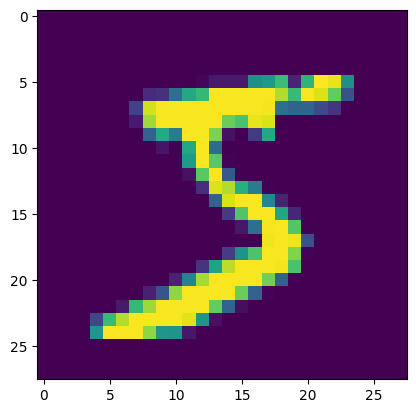

In [8]:
plt.imshow(x_train[0])

In [9]:
x_train=x_train/255
x_test=x_test/255

In [19]:
model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=( 28 ,28,1),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1144 - accuracy: 0.9642
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0698 - accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0535 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0452 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0335 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0237 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 47s 25m

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0557 - accuracy: 0.9867


[0.05568975955247879, 0.9866999983787537]

In [31]:
pred=model.predict(x_test)
#pred=np.argmax(pred)

313/313 [==============================] - 3s 9ms/step


In [32]:
pred

array([[4.4877364e-09, 1.1081460e-06, 2.5917839e-06, ..., 9.9996638e-01,
        1.8022091e-07, 8.8093918e-07],
       [1.0412670e-06, 8.1234674e-07, 9.9999022e-01, ..., 3.2271116e-06,
        1.4637283e-06, 1.5195129e-08],
       [6.9265909e-08, 9.9999845e-01, 9.4776979e-08, ..., 1.1016338e-06,
        1.3024109e-07, 1.0314450e-07],
       ...,
       [4.0029011e-24, 2.6686216e-18, 8.9334489e-18, ..., 4.8973163e-16,
        1.6007784e-14, 8.6919292e-16],
       [5.8781808e-08, 4.4712059e-10, 3.3928252e-10, ..., 3.2925791e-11,
        2.5100495e-05, 1.3898278e-07],
       [2.8172831e-10, 5.6980575e-12, 1.3876512e-10, ..., 9.0923951e-17,
        1.0935394e-09, 1.8904597e-11]], dtype=float32)

In [39]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:

np.argmax(pred[2])

1